### Folla 8- Integrales en varias dimensiones

Abril 2020

In [1]:
import time
print(' Last version ', time.asctime() )

 Last version  Mon May  9 21:56:15 2022


In [2]:
# general imports
%matplotlib inline
%load_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import sympy as sp

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.style.context('seaborn-colorblind');
import graph_utils as gf

sp.init_printing()

In [3]:
x, y, z, t = sp.symbols('x y z t')
n, m       = sp.symbols('n m ', integer = True)
X          = sp.symbols('X')

In [4]:
def sfourier(xfun, L = sp.pi):
    sc  = fun / L * sp.cos( n * sp.pi * x / L)
    ss  = fun / L * sp.sin( n * sp.pi * x / L)
    sas = sp.integrate(sc, (x, -L, L))
    sbs = sp.integrate(ss, (x, -L, L))
    return sas, sbs

**Ejercicio 1** Sea la función $f(x) = 0$ si $-\pi \le x \le 0$ y $f(x) = 1$ si $0 \lt x \lt \pi$. Calcula la serie de Fourier y el valor de la serie:

$$
1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} = \frac{\pi}{4}
$$

Los coeficientes de Fourier:

$$
a_0 = \frac{1}{\pi} \int_0^\pi \mathrm{d}x = \frac{x}{\pi} \Big|^{\pi}_0 = 1
$$

$$
a_n = \frac{1}{\pi} \int_0^\pi \cos nx \, \mathrm{d}x = \frac{1}{n\pi} \sin nx \Big|^{\pi}_0 = 0
$$

$$
b_n = \frac{1}{\pi} \int_0^\pi \sin nx \, \mathrm{d}x = \frac{-1}{n \pi} \cos nx \Big|^{\pi}_0 = \frac{1 - (-1)^n}{n \pi}
$$

La serie de Fourier es:

$$
S(x) = \frac{1}{2} + \frac{2}{\pi} \sum_{k = 0, 1}^{\infty} \frac{1}{(2k+1)} \sin (2k+1) x
$$

Si la valoramos en $x = \pi/2$, $f(\pi/2) = 1$

$$
\sum_{k=0, 1}^{\infty} \frac{1}{(2k+1)} \sin \frac{(2k+1)\pi}{2} = \sum_{k=0, 1}^\infty \frac{(-1)^k}{2k+1} = \frac{\pi}{4}
$$

Esto es:

$$
1 - \frac{1}{3} + \frac{1}{5} + \dots = \frac{\pi}{4}
$$





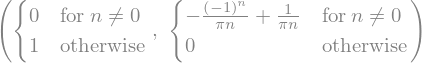

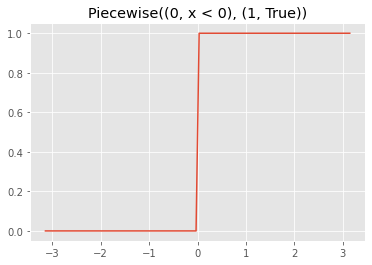

In [5]:
fun = sp.Piecewise((0, x <0), (1, x >= 0))
xs = np.linspace(-np.pi, np.pi, 100)
ys = np.array([fun.subs(x, xi) for xi in xs])
plt.plot(xs, ys); plt.title(fun)
sas, sbs = sfourier(fun)
sas, sbs

**Ejercicio 2** Calcula la serie de Fourier $f(x) = - (\pi+x)/2$ si $-\pi \le x \le 0$, $f(x) = (\pi + x)/2$ si $0 \lt x \lt \pi$.

$f(x)$ es impar, solo hace falta calcular los coeficientes $b_n$

$$
b_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \sin n x\; \mathrm{d}x = \frac{2}{\pi} \int_0^\pi \frac{(\pi-x)}{2} \sin nx \,  \mathrm{d} x = \\
\frac{2}{\pi} \left[\frac{\pi}{2} \frac{(- \cos n \pi)}{n} \Big|_0^\pi - \int_0^\pi  \frac{x}{2} \sin n x \, \mathrm{d}x \right]
$$

La primera integral es:
$$
\frac{-(-1)^n +1}{n}
$$

La segunda integral, si la hacemos por partes

$$
\frac{2}{\pi }\int_0^\pi \frac{x}{2} (-\sin nx) \, \mathrm{d}x = 
\frac{2}{\pi} \left[\frac{x}{2n} \cos nx \Big|_0^\pi -  \int_0^\pi \frac{1}{2n} \cos nx \, \mathrm{d}x\right] = \\
\frac{2}{\pi} \left[\frac{x}{2n} \cos nx \Big|_0^\pi  - \frac{1}{2n^2} \sin nx \Big|_0^\pi \right] = \frac{(-1)^n}{n}
$$

Por lo tanto:
$$
b_n = \frac{1}{n}
$$

Y la serie:
$$
S(x) = \sum_{n=1}^\infty \frac{1}{n} \sin n x
$$

Estudiamos la convergencia en $x = \{-\pi, 0, \pi \}$, en $x = \pm \pi$ converge a 0, y en $x = 0$ la serie converge al punto medio de la función en los $0^-, 0^-$, que es también 0.

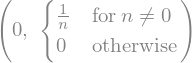

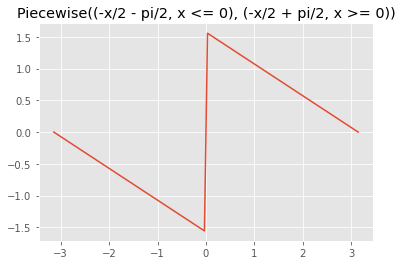

In [6]:
fun = sp.Piecewise((-(sp.pi+x)/2, x <= 0), ((sp.pi-x)/2, x >= 0))
xs = np.linspace(-np.pi, np.pi, 100)
ys = np.array([fun.subs(x, xi) for xi in xs])
plt.plot(xs, ys); plt.title(fun)
sas, sbs = sfourier(fun)
sas, sbs

**Ejercicio 3** Calcula la serie que vale 1 si $0 \lt x \lt \pi/2$ y en el resto 0.

$$
a_0 = \frac{1}{\pi} \int_0^{\pi/2} \, \mathrm{d}x = \frac{x}{\pi} \Big|^{\pi/2}_0 = \frac{1}{2}
$$

$$
a_n = \frac{1}{\pi} \int_0^{\pi/2} \cos nx \, \mathrm{d}x = \frac{1}{\pi n} \sin nx \Big|^{\pi/2}_0 = \frac{1}{\pi n} \sin \frac{n\pi}{2}
$$

si $n$ es par $a_n = 0$, si n es impar, $n = 2k+1$ con $k=0, 1, ...$

$$
a_k = \frac{1}{(2k+1) \pi} \sin (2k+1) \frac{\pi}{2} = \frac{1}{(2k+1) \pi} (-1)^k
$$

Los coeficientes:

$$
b_n = \frac{1}{\pi} \int_0^{\pi/2} \sin nx \, \mathrm{d}x = - \frac{1}{\pi n} \cos nx \Big|^{\pi/2}_0 = \left(1 - \cos \frac{n\pi}{2} \right) \frac{1}{\pi n}
$$

Si $n$ es par $n = 2k$, con $k= 1, 2, ...$:

$$
\cos \frac{2k\pi}{2} = (-1)^k, \;\;\; b_k = \frac{(1 - (-1)^k)}{2k \pi } 
$$

Si $n$ es impar $n = 2k +1$ con $k= 0, 1, 2$

$$
\cos \frac{(2k+1) \pi}{2} = 0, \;\;\; b_k = \frac{1}{(2k+1) \pi}
$$

Por lo tanto la serie queda:

$$
S(x) = \frac{1}{4} + \sum_{k=0,1}^\infty \frac{(-1)^k}{(2k+1) \pi}\cos (2k+1) x+ \sum_{k = 0,1}^\infty \frac{(1 - (-1)^k)}{2k \pi}\sin(2k)x + \sum_{k=0, 1}^\infty \frac{1}{(2k+1) \pi}\sin (2k+1) x
$$

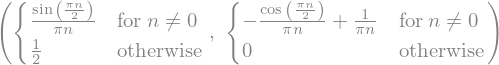

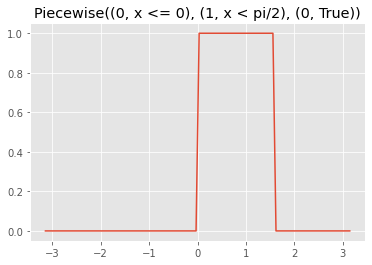

In [7]:
fun = sp.Piecewise((0, x <= 0), (1, x < sp.pi/2), (0, True))
xs = np.linspace(-np.pi, np.pi, 100)
ys = np.array([fun.subs(x, xi) for xi in xs])
plt.plot(xs, ys); plt.title(fun)
sas, sbs = sfourier(fun)
sas, sbs

**Ejercicio 4** Calcula la seriede de Fourier para $f(x) = x^2$ definida en $\pi \le x \lt \pi$, y calcula:

$$
\sum_n \frac{1}{n^2} = \frac{\pi^2}{6}
$$

La función es par, calculamos $a_0, a_n$:

$$
a_0 = \frac{2}{\pi} \int_0^\pi x^2 \, \mathrm{d}x = \frac{2}{3\pi} x^3 \Big|^\pi_0 = \frac{2\pi^2}{3}
$$

$$
a_n = \frac{2}{\pi} \int_0^\pi x^2 \cos nx \, \mathrm{d}x = \frac{2}{\pi} \left[\frac{x^2}{n}\sin nx \Big|^\pi_0 - \int_0^\pi \frac{2x}{n} \sin nx \, \mathrm{d}x \right]
$$

La integral:

$$
\int_0^\pi \frac{2x}{n} \sin nx \, \mathrm{d}x = - \frac{2x}{n^2} \cos nx + \int_0^\pi \frac{2}{n^2} \cos nx \, \mathrm{d}x = -\frac{2x}{n^2} \cos nx + \frac{2}{n^3} \sin nx
$$

Como solo sobreviven los términos $\cos nx$ en los extremos $\pi, 0$ tenemos:

$$
a_n = \frac{4}{n^2} \cos n\pi = \frac{4}{n^2} (-1)^n 
$$

La series es:

$$
S(x) = \frac{\pi^2}{3} + \sum_{n=1, 2}^\infty \frac{4}{n^2} (-1)^n \cos n x
$$

Si la valoramos en $x = \pi$, $f(x) = \pi^2$, así:

$$
\pi^2 = \frac{\pi^2}{3} + \sum_{n} \frac{4}{n^2} (-1)^{2n}, \;\;\; \sum_n \frac{1}{n^2} = \frac{\pi^2}{6}
$$



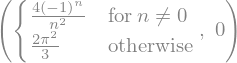

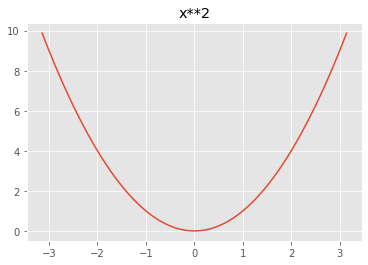

In [8]:
fun = x**2
xs = np.linspace(-np.pi, np.pi, 100)
ys = np.array([fun.subs(x, xi) for xi in xs])
plt.plot(xs, ys); plt.title(fun)
sas, sbs = sfourier(fun)
sas, sbs

**Ejercicio 5** Calcula la series de Fourier $f(x) = x^4$ en el intervalo $\-pi \le x \lt \pi$, y demostrar:

$$
\sum_{n=1, 2}^\infty \frac{1}{(2n-1)^4} = \frac{\pi^4}{96}, \;\;\; \sum_n \frac{1}{n^4} = \frac{\pi^4}{90}
$$

Al ser una función par solo necesitamos calcular los coeficientes $a_0, a_n$

$$
a_0 = \frac{2}{\pi} \int_0^\pi x^4 \, \mathrm{d}x = \frac{2}{5\pi} x^5 \Big|^\pi_0 = \frac{2 \pi^4}{5}
$$

y
$$
a_n = \frac{2}{\pi} \int_0^\pi x^4 \cos nx \, \mathrm{d}x 
= \frac{2}{\pi} \left[ \frac{x^4}{n} \sin nx \Big|^\pi_0- \int_0^\pi \frac{4x^3}{n} \sin nx \mathrm{d}x \right]
$$

El primer sumando del paréntesis, al ser $\sin nx$ en $x = \pi, 0$ es nulo.

$$
a_n = -\frac{8}{\pi n} \int_0^\pi x^3 \sin nx \, \mathrm{d}x \\ 
    = -\frac{8}{\pi n} \left[ - \frac{x^3}{n} \cos nx \Big|^\pi_0 + \int_0^\pi \frac{3x^2}{n} \cos nx \, \mathrm{d}x \right] \\
    = \frac{8 \pi^2}{n^2} (-1)^n - \frac{24}{n^2\pi} \int^\pi_0 x^2 \cos nx \, \mathrm{d}x 
$$

La integral:

$$
\int_0^\pi x^2 \cos nx \, \mathrm{d}x =  \frac{1}{n} x^2 \sin nx \Big|^\pi_0 - \frac{2}{n} \int^\pi_0 x \sin nx \, \mathrm{d}x = -\frac{2}{n } \int^\pi_0 x \sin nx \, \mathrm{d}x  \\
= -\frac{2}{n} \left[ - \frac{x}{n} \cos nx \Big|_0^\pi + \int_0^\pi \frac{\cos nx}{n}\right] \\
= -\frac{2}{n} \left[ - \frac{x}{n} \cos nx \Big|_0^\pi + \frac{\sin nx}{n^2} \Big|^\pi_0\right] = \frac{2\pi}{n^2} (-1)^n
$$

Por lo tanto:

$$
a_n = \frac{8}{n^2} \left( \pi^2 - \frac{6}{n^2} \right) (-1)^n
$$

y la serie:

$$
S(x) = \frac{\pi^4}{5} + \sum_n \frac{8}{n^2} \left( \pi^2 - \frac{6}{n^2} \right) (-1)^n \cos nx
$$

Si escogemos $x = \pi$ entonces $\cos n\pi = (-1)^n$ y en el sumatorio tenemos $(-1)^2n$

$$
S(\pi) = \frac{\pi^4}{5} + \sum_n \frac{8\pi^2}{n^2} - \sum_n \frac{48}{n^4} = \pi^4
$$

En el ejercicio anterior demostramos que $\sum_n \frac{1}{n^2} = \frac{\pi^2}{6}$

$$
\frac{8\pi^4}{6} - \sum_n \frac{48}{n^4} = \frac{4\pi^4}{5}
$$

$$
\sum_n \frac{1}{n^4} = \frac{1}{2^4 3} \frac{24-8}{30} \pi^4 = \frac{1}{2^4 3} \frac{2^4}{3 \, 2 \, 5} \pi^4= \frac{\pi^4}{90} 
$$

Si separamos $\sum_n 1/n^2$ en términos pares e impares:

$$
\sum_{k= 0, 1}^{\infty} \frac{1}{(2k+1)^4} + \sum_n \frac{1}{(2k)^4} = \frac{\pi^4}{90} \\
\sum_{k=0,1}^\infty \frac{1}{(2k+1)^4} = \frac{\pi^4}{90} \left( 1 - \frac{1}{16}\right) = \frac{3 \, 5}{ 2^5 \, 3^2 \,5} \pi^4 = \frac{1}{2^5 \, 3} \pi^4 = \frac{\pi^4}{96}
$$

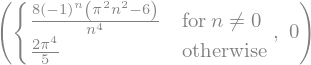

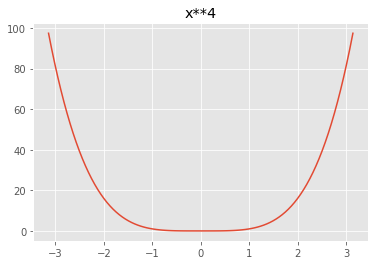

In [9]:
fun = x**4
xs = np.linspace(-np.pi, np.pi, 100)
ys = np.array([fun.subs(x, xi) for xi in xs])
plt.plot(xs, ys); plt.title(fun)
sas, sbs = sfourier(fun)
sp.simplify(sas), sbs

**Ejercicio 6**

Calcula la seriede de fourier $f(\theta) = |\sin \theta|$, en $-\pi \le x \lt \pi$ y calcula la suma de la serie en $\theta = 0, \pi/2$

La función es par y por lo tanto solo calculamos $a_0, a_n$

$$
a_0 = \frac{2}{\pi} \int_0^\pi \sin \theta \, \mathrm{d}\theta = \frac{2}{\pi} (-\cos \theta)\Big|_0^\pi = \frac{4}{\pi}
$$

$$
a_n = \frac{2}{\pi} \int_0^\pi \sin \theta \cos n \theta \, \mathrm{d}\theta \\ 
  = \frac{1}{\pi} \int_0^\pi \left[ \sin (n+1) \theta - \sin (n-1) \theta \right] \, \mathrm{d}\theta \\
$$
Como $2 \sin a \cos b = \sin(a+b) + \sin(a-b)$, notar que cambiamos el signo en el segundo sumando, al colocar $n-1$!
$$
  = -\frac{1}{\pi} \left[ \frac{\cos (n+1) \theta}{(n+1)} - \frac{\cos (n-1) \theta}{(n-1)}\right]_0^\pi \\
  = -\frac{1}{\pi} \left[ \frac{(-1)^{(n+1)} -1}{(n+1)} - \frac{(-1)^{(n-1)}-1}{(n-1)} \right] \\
  = -\frac{1}{\pi} \left[ \frac{-(-1)^n - 1}{n+1} - \frac{-(-1)^n-1}{n-1} \right] \\  
  = \frac{(1 + (-1)^n)}{\pi(n^2-1)} (-2) 
$$

La serie nos queda:

$$
S(\theta) = \frac{2}{\pi} \left[ 1 -  \sum_n \frac{1 + (-1)^2}{(n^2-1)} \cos n\theta \right]
$$

Para $n$ impar la serie se anula, y para par queda:

$$
S(\theta) = \frac{2}{\pi} \left[ 1 - \sum_{k=1}^\infty \frac{2}{4k^2-1} \cos 2k \theta \right]
$$

En el caso $\theta = 0$
$$
0 = \frac{2}{\pi} \left[ 1 - \sum_k \frac{2}{4k^2-1}\right], \;\;\; \sum_k \frac{1}{4k^2-1} = \frac{1}{2}
$$

Y para el caso $\theta = \pi/2$

$$
1 = \frac{2}{\pi} \left[ 1 - \sum_k \frac{2}{4k^2-1} (-1)^k \right], \;\;\; \sum_k \frac{(-1)^k}{2k^2-1} = \frac{2-\pi}{4}
$$

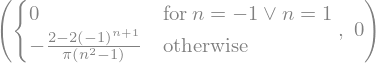

In [10]:
fun = sp.Abs(sp.sin(x))
#xs = np.linspace(-X, X, 100)
#ys = np.array([fun.subs(x, xi) for xi in xs])
#plt.plot(xs, ys); plt.title(fun)
sas, sbs = sfourier(fun)
sp.simplify(sas), sbs

**Ejercicio 7** Indica si son pares o impares las funciones

7.1) $f(x) = x^5$, impar 

7.2) $f(x) = \sin x$, impar 

7.3) $f(x) = e^x$, ninguna

7.4) $f(x) = \sin^3x$, impart

7.5) $f(x) = \sin x^2$, par

7.6) $f(x) = \cos (x + x^3)$, par

7.7) $f(x) = x + x^2 + x^3$, ninguna

7.8) $f(x) = \log \frac{1+x}{1-x}$, impar

7.9) $f(x) = 1$, par

7.10) $f(x) = 1+x$, ninguna

**Ejercicio 8** Demuestra que 
$$
\frac{L}{2} - x = \frac{L}{\pi} \sum_n \frac{1}{n} \sin \frac{2\pi n x}{L}$$

en $0 \lt x \lt L$, a partir de la seerie de Fourier de $x$ en $[-L/2, L/2]$


Desarrollamos la serie de Fourier de la función $f(x) = x$ en el intervalo $[-L/2, L/2]$.

Como es una función par solo calculamos $b_n$

$$
b_n = \frac{2}{L} \int_{-L/2}^{L/2} x \sin \frac{2n\pi x}{L} \, \mathrm{d}x \\
    = \frac{4}{L} \int_0^{L/2} x \sin \frac{2n\pi x}{L} \, \mathrm{d}x 
$$

Integramos por partes:

$$
b_n = \frac{4}{L} \left[ -\frac{x L}{ 2n \pi} \cos \frac{2n\pi x}{L} \Big|_0^{L/2}+ \int_{-L/2}^{L/2} \frac{L}{2n\pi} \cos \frac{2n\pi x}{L} \, \mathrm{d}x  \right] \\
    = \frac{4}{L} \left[ -\frac{x L}{ 2n \pi} \cos \frac{2n\pi x}{L} \Big|_0^{L/2}+  \left(\frac{L}{2n\pi}\right)^2 \sin \frac{2n\pi x}{L} \Big|_0^{L/2}  \right] \\
    = -\frac{L}{n\pi} \cos n\pi = \frac{L}{n\pi} (-1)^{(n+1)}
$$

Dado que $\sin n\pi = 0$

La serie queda:

$$
S(x) = \sum_{n=1}^\infty \frac{L}{n\pi} (-1)^{(n+1)} \sin \frac{2n\pi x}{L}
$$


si hacemos el cambio de variable $y = x + L/2$, el intervalo de $y$ será $[0, L]$

$$
S(y-L/2) = \sum_n \frac{L}{n\pi} (-1)^{(n+1)} \sin\frac{2n\pi}{L} \left( y - \frac{L}{2}\right)
$$

Con el cambio $\sin (a-b) = \sin a \cos b - \cos a \sin b$

la expresión:

$$
\sin\frac{2n\pi}{L} \left( y - \frac{L}{2}\right) = \sin\frac{2n\pi y }{L} \cos(-n\pi) - \cos \frac{2n\pi y}{L} \sin(-n\pi) \\
= (-1)^n \sin\frac{2n\pi y }{L}
$$

y por lo tanto:

$$
y - \frac{L}{2} = - \sum_n \frac{L}{n\pi} \sin \frac{2n\pi y}{L}
$$

cambiamos de signo y renombramos $x \to y$:

$$
\frac{L}{2} - x = \frac{L}{\pi} \sum_n \frac{1}{n} \sin \frac{2n \pi x}{L}
$$



**Ejercicio 9** Da la serie de Fourier de $f(x) = \cos \pi x$ en el intervalo $1 \lt x \le 2$

Si hacemos el cambio de variable: $y = x - 3/2$, el intervalo de integración es: $(-1/2, 1/2]$, y podemos hacer el desarrollo de Taylor con $L = 1/2$.

La función será:

$$
f(y) = \cos \pi (y + 3/2) = \sin \pi y
$$

que es una función impar, solo calculamos los términos $b_n$

$$
b_n = \frac{1}{L} \int_{-L}^{L} f(y) \sin \frac{n \pi y}{L} \, \mathrm{d}y
$$

En nuestro caso con $L = 1/2$

$$
b_n = 2 \int_{-1/2}^{1/2} \sin \pi y \, \sin 2n \pi y \, \mathrm{d}y
$$

como $2 \sin a \sin b = \cos (a -b) - \cos (a + b) $

$$
b_n = 2 \int_0^{1/2} \left[ \cos (2n -1) \pi y - \cos (2n+1) \pi y \right] \, \mathrm{d}y \\
    = 2 \left[ \frac{\sin (2n-1) \pi y}{(2n-1) \pi} - \frac{\sin (2n+1) \pi y}{(2n+1) \pi}\right]_0^{1/2}
$$

como $\sin (2n-1) \pi/2 = (-1)^{n+1}$ y $\sin (2n+1) \pi/2 = (-1)^n$, tenemos:

$$
b_n = \frac{2}{\pi} \left[ \frac{(-1)^{(n+1)}}{(2n-1)} - \frac{(-1)^n}{(2n+1)}\right] \\
$$
$$
= - \frac{2 (-1)^n}{\pi} \left[ \frac{1}{(2n+1)} + \frac{1}{(2n-1)} \right] =   \frac{8n \, (-1)^{(n+1)}}{(4n^2-1) \pi}
$$

Asi pues la serie queda:

$$
S(y) = \sum_n \frac{8 n \, (-1)^{n+1}}{(4n^2-1) \pi} \sin 2n\pi y
$$

Volvemos a deshacer el cambio

$$
S(y) = \sum_n b_n \sin 2n \pi (x-3/2) 
$$

Como $\sin (a + b) = \sin a \cos b + \cos a \sin b$ tenemos:

$$
S(y) = \sum_n b_n \left[ \sin 2n\pi x \cos -3 n \pi + \cos 2n\pi x \sin -3 n \pi \right]
$$

como $\cos 3 n \pi = (-1)^n$ y $\sin 3n \pi = 0$, tenemos:

$$
\cos(\pi x) = - \sum_n \frac{8 n}{\pi (4n^2-1)} \sin 2n\pi x
$$

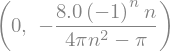

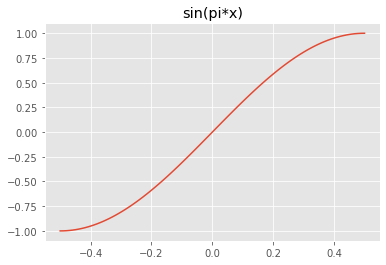

In [11]:
fun = sp.sin(sp.pi * x )
xs = np.linspace(-0.5, 0.5, 100)
ys = np.array([fun.subs(x, xi) for xi in xs])
plt.plot(xs, ys); plt.title(fun)
sas, sbs = sfourier(fun, 0.5)
sp.simplify(sas), sbs

**Ejercicio 10**

Da la serie de Fourier para la función $f(x) = e^x$ en el intervalo $-1 \le x \lt 1$. ¿Cuál es el valor de la extensión periódica en $x = 2$?


En este caso el periodo es $T = 2$ y los coeficientes de Fourier:

$$
a_0 = \frac{1}{L} \int_{-L}^{L} f(x) \, \mathrm{d}x = \int_{-1}^1 e^x \, \mathrm{d}x = e^x \Big|_{-1}^1 = e - e^{-1} = \frac{e^2-1}{e}
$$

para los coeficientes $a_n$

$$
a_n = \frac{1}{L} \int_{-L}^{L} f(x) \cos \frac{n \pi x}{L} \, \mathrm{d}x = \int_{-1}^1 e^x \cos n \pi x \, \mathrm{d}x \\
$$

por partes dos veces:

$$
a_n = \frac{e^x}{n\pi} \sin n\pi x \Big|_{-1}^1 - \int_{-1}^1 \frac{e^x}{n\pi} \sin n\pi x \, \mathrm{d}x \\
    = \frac{e^x}{n\pi} \sin n\pi x \Big|_{-1}^1 - \frac{1}{n\pi} \left[ -\frac{e^x}{n\pi} \cos n \pi x \Big|_{-1}^1+ \frac{1}{n\pi} a_n\right]
$$

Si despejamos $a_n$, teniendo en cuenta que $\sin \pm n\pi = 0$

$$
\frac{[(n\pi)^2 +1]}{(n\pi)^2} a_n = \frac{1}{(n\pi)^2} \frac{e^2-1}{e} \cos n\pi, \\
a_n = \frac{(-1)^2}{(n\pi)^2 +1} \frac{e^2-1}{e} 
$$



Para los coeficientes $b_n$

$$
b_n = \frac{1}{L} \int_{-L}^L f(x) \sin \frac{n\pi x}{L} \mathrm{d}x = \int_{-1}^1 e^x \sin n\pi x \, \mathrm{d}x
$$

De nuevo, integrando por partes dos veces:

$$
b_n = \frac{-e^x}{n\pi} \cos nx \Big|_{-1}^1 + \int_{-1}^1 \frac{e^x}{n\pi} \cos n\pi x \, \mathrm{d}x \\
    =  \frac{-e^x}{n\pi} \cos nx \Big|_{-1}^1 + \frac{e^x}{(n\pi)^2} \sin n\pi x \Big|_{-1}^1 - \frac{b_n}{(n\pi)^2}
$$

Si despejamos $b_n$, teniendo en cuenta de nuevo que $\sin \pm n\pi = 0$

$$
\frac{(n\pi)^2 +1}{(n\pi)^2} b_n = \frac{-e^x}{n\pi} \cos nx \Big|_{-1}^1, \\
b_n = \frac{n\pi}{(n\pi)^2 +1} \frac{e^2-1}{e} (-1)^{n+1}
$$

La serie de Fourier nos queda:

$$
S(x) = \frac{e^2-1}{e} \left[ \frac{1}{2} + \sum_{n=1}^\infty \frac{(-1)^n}{(n\pi)^2 +1} \left[ \cos n\pi x 
- (n\pi) \sin n\pi x \right] \right]
$$

En este caso, en la extensión $S(2) = S(0)$

$$
S(0) = \frac{e^2-1}{e} \left[ \frac{1}{2} + \sum_{n=1}^\infty \frac{(-1)^n}{(n\pi)^2 +1} \right]
$$

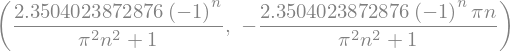

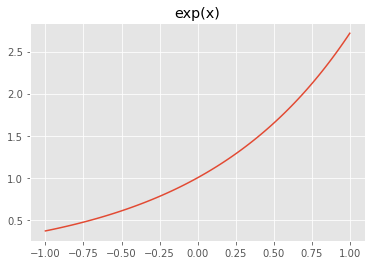

In [12]:
fun = sp.exp(x)
xs = np.linspace(-1., 1., 100)
ys = np.array([fun.subs(x, xi) for xi in xs])
plt.plot(xs, ys); plt.title(fun)
sas, sbs = sfourier(fun, 1.)
sp.simplify(sas), sbs

**Ejercicio 11**

Sea la función $f(x) = e^{-x^2}$ definida en $[0,1 ]$

1) Extensión par: $f(x) = e^{-x^2}$ en [-1, 1]

2) Extensión impar: $f(x) = e^{-x^2}$ si $0 \le x \le 1$, $f(x) = - e^{-x^2}$ si $-1 \le x \lt 0$.

3) Con periodo $T = 1$, $f(x) = e^{-x^2}$ en $[0, 1]$

4) con periodo $T = 2$, $f(x) = e^{-x^2}$ en $[0, 2]$

5) Las dos anteriores difieren en $x=1$, ya que en la primera y segunda se aplica Dirichlet.


**Ejercicio 12**

Dibuja la función, indica si es par o impar, calcula los coeficientes de Fourier e indica a qué valores converge la serie en los valores $-\pi, \pi$

$$
f(x) = \left\{
     \begin{array}{lr}
     -2x-\pi, \;\; -\pi \le x \le -\pi/2 \\
      0, \;\; -\pi/2 \lt x \lt \pi/2 \\
     2x-\pi, \;\; \pi/2 \le x \lt \pi
     \end{array}
   \right.
$$


La función es par (ver abajo), y solo calculamos los coeficientes $a_0, a_n$

$$
a_0 = \frac{2}{\pi} \int_{\pi/2}^{\pi} (2x - \pi) \, \mathrm{d}x \\
    = \frac{2}{\pi} \left[ x^2 - \pi x\right]^\pi_{\pi/2}  = \frac{2}{\pi} \left[ \frac{3\pi^2}{4} - \frac{\pi^2}{2}\right] = \frac{\pi}{2}
$$

y 

$$
a_n = \frac{2}{\pi} \int_{\pi/2}^\pi (2x - \pi) \, \cos nx \, \mathrm{d}x
$$

$$
\int_{\pi/2}^{\pi} 2x \cos nx \, \mathrm{d}x = \left[ \frac{2x}{n} \sin nx  + \frac{2}{n^2} \cos nx \right]_{\pi/2}^\pi \\
= -\frac{\pi}{n} \sin \frac{n\pi}{2} + \frac{2}{n^2} \cos  n \pi - \frac{2}{n^2} \cos \frac{n \pi}{2}
 $$
 
 $$
 - \pi \int_{\pi/2}^\pi \cos nx \, \mathrm{d}x = - \frac{\pi}{n} \sin nx \Big|^{\pi}_{\pi/2} = \frac{\pi}{n} \sin \frac{n\pi}{2}
 $$

Por lo tanto:

$$
a_n = \frac{4}{\pi n^2} \left[ \cos n \pi - \cos \frac{n\pi}{2}\right] = \frac{4}{\pi n^2} \left[ (-1)^n - \cos \frac{n\pi}{2}\right]
$$

El segundo sumando es nulo si $n$ es impar por lo tanto podemos dar:

$$
S(x) = \frac{\pi}{4} + \frac{4}{\pi} \left[ \sum_{n=1}^\infty \frac{(-1)^n}{n^2} \cos n x - \frac{(-1)^n}{4n^2} \cos 2nx \right]
$$

En los extremos la función vale $f(\pi) = f(-\pi) = \pi$ y la serie también $S(\pi) = S(-\pi) = \pi$.

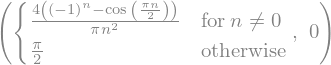

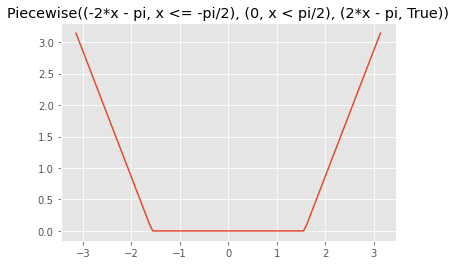

In [13]:
fun = sp.Piecewise((-2*x - sp.pi, x <= -sp.pi/2), (0, x < sp.pi/2), (2*x - sp.pi, True))
xs = np.linspace(-np.pi, np.pi, 100)
ys = np.array([fun.subs(x, xi) for xi in xs])
plt.plot(xs, ys); plt.title(fun)
sas, sbs = sfourier(fun)
sp.simplify(sas), sbs